### Notes

* Insertion sort is the simplest comprehensive sort type.
* It parallells the way that people sort playing cards in-hand.
* It is simple to implement and fast for small numbers of elements.

### Python implementation

In [8]:
def insertion_sort(a):
    for j in range(1, len(a)):
        key = a[j]
        i = j - 1
        while (i > -1 and a[i] > key):
            a[i + 1] = a[i]
            i -= 1
        a[i + 1] = key
    return a

In [36]:
insertion_sort([5,2,4,6,1,3])

[1, 2, 3, 4, 5, 6]

In [39]:
def insertion_sort_alt(a):
    for j in range(1, len(a)):
        key = a[j]
        i = j - 1
        while (i > -1 and a[i] > key):
            a[i + 1], a[i] = a[i], a[i + 1]
            i -= 1
    return a

In [40]:
insertion_sort_alt([5,2,4,6,1,3])

[1, 2, 3, 4, 5, 6]

### Python tests

In [50]:
import hypothesis.strategies as st
from hypothesis import given

@given(a=st.lists(st.integers()))
def test_insertion_sort(a):
    all(a[i - 1] < a[i] for i in range(len(a)))
    
@given(a=st.lists(st.integers()))
def test_insertion_sort_alt(a):
    all(a[i - 1] < a[i] for i in range(len(a)))
    
test_insertion_sort()
test_insertion_sort_alt()

### JavaScript implementation

In [23]:
%%javascript

window.insertion_sort = function insertion_sort(a) {
    let j = null;
    let i = null;
    for (j=1; j < a.length; j++) {
        let key = a[j];
        i = j - 1;
        while (i > -1 && a[i] > key) {
            a[i + 1] = a[i];
            i--;
        }
        a[i + 1] = key;
    }
    return a;
}

window.print = function(id, output) { document.getElementById(id).innerHTML = String(output) }

<IPython.core.display.Javascript object>

In [25]:
%%html

<g id="holder_1"></g>
<script>window.print("holder_1", window.insertion_sort([5,2,4,6,1,3]))</script>

### JavaScript tests

*I run these via `node` using `mocha -g <Algo Name>`.*

In [1]:
!mocha -g "Insertion Sort"



  Insertion Sort (JSVerify)
    âˆš returns an empty list when the list is empty

  Insertion Sort (Mocha)
    âˆš returns an empty list when the list is empty
    âˆš returns the same element when the list contains a single element
    âˆš returns elements in sorted order when there are many of them


  4 passing (9ms)



### Formal proof of correctness

*I will usually omit this, unless you're writing a paper passing (well-written) tests is more important.*

### Formal timing

Insertion sort requires a `for-while` loop, meaning it is $O(n^2)$.

In the best case, the list is already in order, requiring $n - 1$ comparisons. In the worst case, the list is in reverse order, requiring $(n - 1)^2$ comparisons.

### Python timing

In [42]:
from time import time

def timer(func, *args, **kwargs):
    start = time()
    func(*args, **kwargs)
    end = time()
    return end - start

In [76]:
import numpy as np

best = []
mid = []
worst = []

ns = np.logspace(0, 3, num=40)
for n in ns:
    n_ints = np.random.random(n)
    
    mid.append(timer(insertion_sort, n_ints))
    best.append(timer(insertion_sort, sorted(n_ints)))
    worst.append(timer(insertion_sort, sorted(n_ints)[::-1]))

C:\Users\Alex\Anaconda3\envs\algos\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


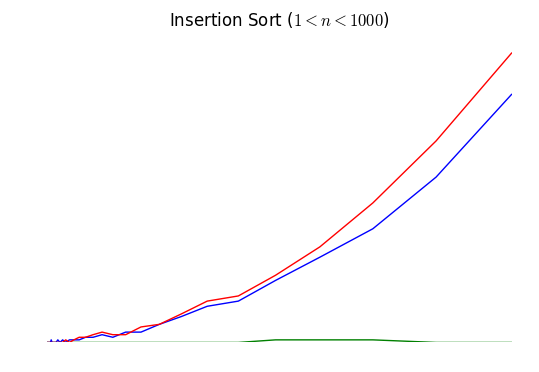

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ns, best, color='green')
plt.plot(ns, mid, color='blue')
plt.plot(ns, worst, color='red')
ax = plt.gca()
ax.axis('off')
plt.title("Insertion Sort ($1 < n < 1000$)")